In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf


from model import ImageModel
from utils import load_image, display_image

Using TensorFlow backend


/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/models/back

In [2]:
BATCH_SIZE = 8
backbone = "csp_darknet"

In [3]:
model = ImageModel(backbone=backbone)

train_dataset, test_dataset = tfds.load(
    'rock_paper_scissors',
    as_supervised=True,
    split=["train", "test"],
)

train_dataset = train_dataset.batch(BATCH_SIZE).map(
    lambda x, y: model.preprocess_data(x, y, augment=True),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.batch(BATCH_SIZE).map(
    lambda x, y: model.preprocess_data(x, y, augment=True),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

In [4]:
model.train(f"output/{backbone}_{BATCH_SIZE}", train_dataset, test_dataset)

FileExistsError: [Errno 17] File exists: 'output/csp_darknet_8'

In [ ]:
image = load_image("data/scissors.jpg")
image_class, class_confidence, _ = model.predict(image)
display_image(image, 0, image_class, class_confidence)

TypeError: Tensor is unhashable. Instead, use tensor.ref() as the key.

In [ ]:
from utils import get_label
from config import *

image_probs = model.model(image)
class_num = tf.math.argmax(image_probs[0])

image_class = CLASSES[class_num.numpy()]
class_confidence = image_probs[0][class_num]

In [ ]:
class_confidence

<tf.Tensor: shape=(), dtype=float32, numpy=0.58517855>

In [ ]:
_, pertubations = model.generate_adv_image(image, 0.3, return_pertubations=True)
plt.imshow(pertubations[0]*0.5 + 0.5) # To change [-1, 1] to [0,1]

ValueError: Passed in object [[[[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  ...

  [[ 88.333496  60.333496  46.333496]
   [ 86.        58.        44.      ]
   [ 84.4445    56.4445    42.4445  ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[ 86.        60.        45.      ]
   [ 83.        57.        42.      ]
   [ 86.        60.000004  47.000004]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[ 80.333496  54.333496  39.333496]
   [ 83.        57.        42.      ]
   [ 74.99983   49.99959   35.999836]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]]] of type 'ndarray', not tf.Tensor or tf.Variable or ExtensionType.

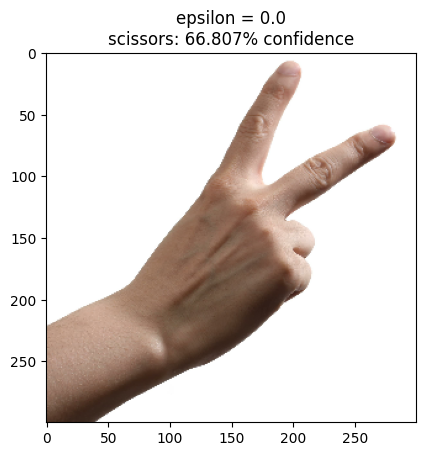

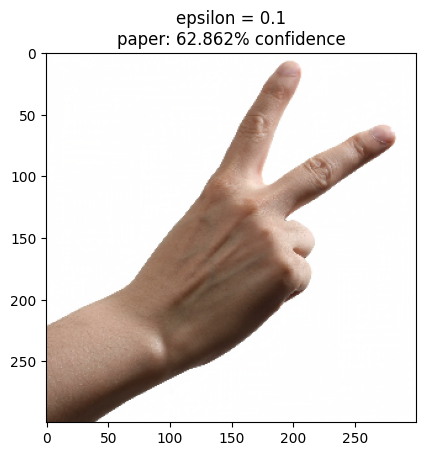

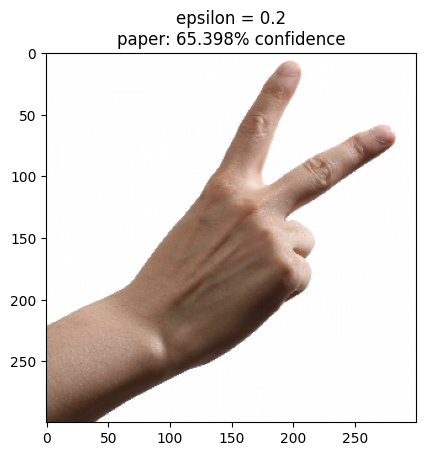

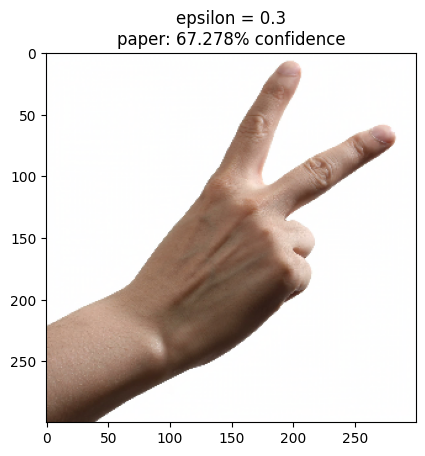

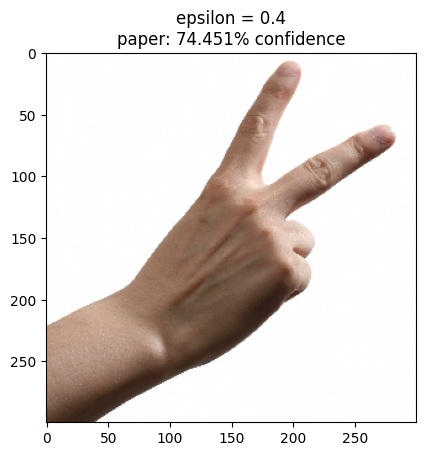

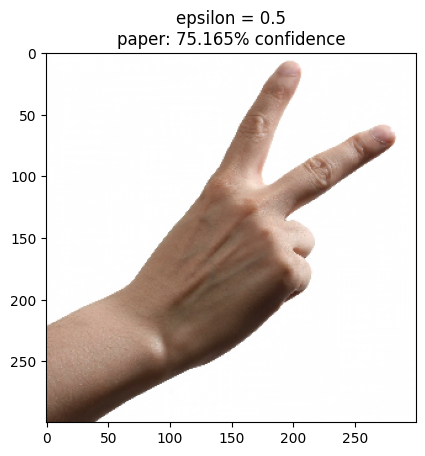

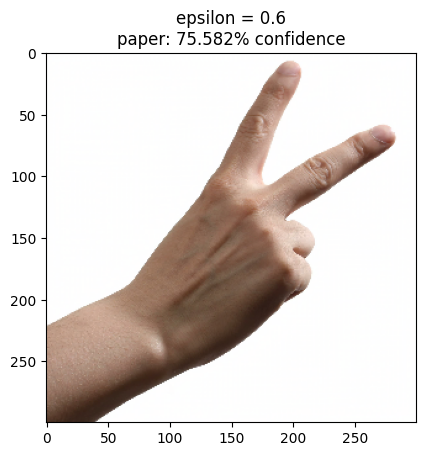

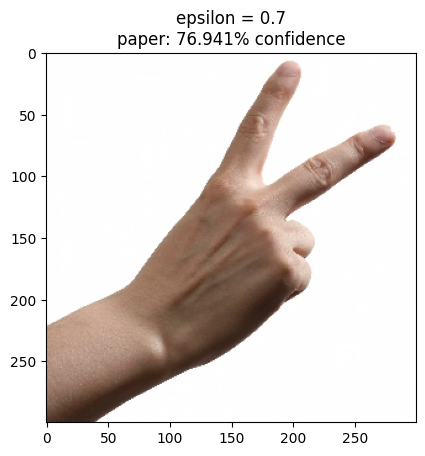

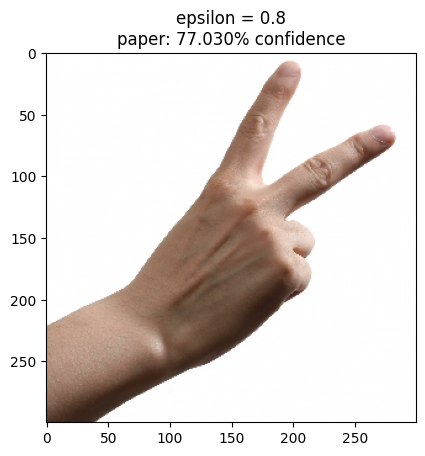

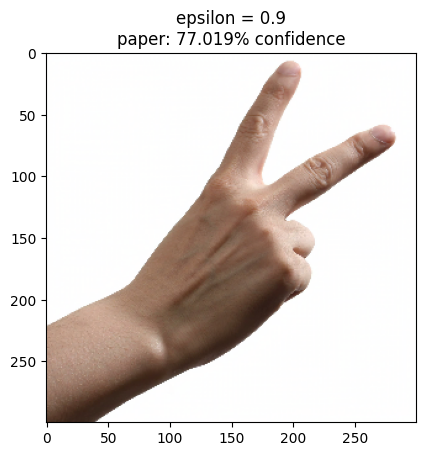

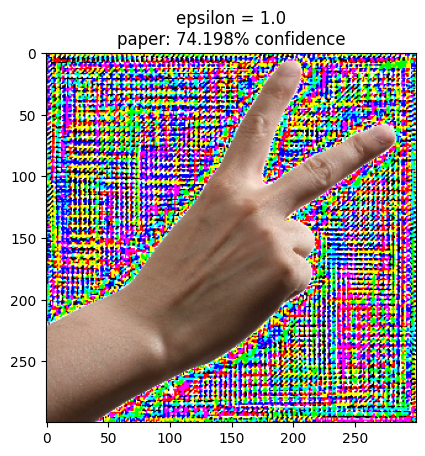

In [ ]:
for sigma in range(11):
    sigma = sigma/10
    adv_img = model.generate_adv_image(image, sigma)
    image_class, class_confidence, _ = model.predict(tf.cast(adv_img, tf.uint8))
    display_image(adv_img, sigma, image_class, class_confidence)

In [ ]:
model.model(image)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.2566525 , 0.17549726, 0.56785023]], dtype=float32)>

In [ ]:
tf.math.argmax(model.model(image)[0])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
train_dataset2, test_dataset2 = tfds.load(
    'rock_paper_scissors',
    as_supervised=True,
    split=["train", "test"],
)

train_dataset2 = train_dataset2.batch(BATCH_SIZE).map(
    lambda x, y: model.preprocess_data(x, y, augment=True, sigma=0.9),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

test_dataset2 = test_dataset2.batch(BATCH_SIZE).map(
    lambda x, y: model.preprocess_data(x, y, augment=True),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)


model2 = ImageModel(backbone=backbone)

NotImplementedError: in user code:

    File "/tmp/ipykernel_25117/3250151568.py", line 8, in None  *
        lambda x, y: model.preprocess_data(x, y, augment=True, sigma=0.9)
    File "/mnt/f/Pesquisa/computer_vision/cv_final_project/model.py", line 66, in preprocess_data  *
        inputs = augmenter(inputs)
    File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/layers/augmenter.py", line 44, in __call__  *
        inputs = layer(inputs)
    File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_fileqh10ionh.py", line 66, in tf__call
        ag__.if_stmt(ag__.ld(images).shape.rank == 3, if_body_2, else_body_2, get_state_2, set_state_2, ('outputs',), 1)
    File "/tmp/__autograph_generated_fileqh10ionh.py", line 64, in else_body_2
        ag__.if_stmt(ag__.ld(images).shape.rank == 4, if_body_1, else_body_1, get_state_1, set_state_1, ('outputs',), 1)
    File "/tmp/__autograph_generated_fileqh10ionh.py", line 58, in if_body_1
        outputs = ag__.converted_call(ag__.ld(self)._format_output, (ag__.converted_call(ag__.ld(self)._batch_augment, (ag__.ld(inputs),), None, fscope), ag__.ld(metadata)), None, fscope)
    File "/tmp/__autograph_generated_filex1rc5__m.py", line 12, in tf___batch_augment
        retval_ = ag__.converted_call(ag__.ld(self)._map_fn, (ag__.ld(self)._augment, ag__.ld(inputs)), None, fscope)
    File "/tmp/__autograph_generated_filebe17931c.py", line 61, in tf___map_fn
        ag__.if_stmt(ag__.or_(lambda : ag__.converted_call(ag__.ld(self)._any_ragged, (ag__.ld(inputs),), None, fscope), lambda : ag__.ld(self).force_output_ragged_images), if_body_1, else_body_1, get_state_1, set_state_1, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_filebe17931c.py", line 60, in else_body_1
        ag__.if_stmt(ag__.ld(self).auto_vectorize, if_body, else_body, get_state, set_state, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_filebe17931c.py", line 47, in if_body
        retval_ = ag__.converted_call(ag__.ld(tf).vectorized_map, (ag__.ld(func), ag__.ld(inputs)), None, fscope)
    File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/layers/preprocessing/base_image_augmentation_layer.py", line 484, in _augment
        image = self.augment_image(
    File "/mnt/f/Pesquisa/computer_vision/cv_final_project/model.py", line 25, in augment_image
        adv_image = self.adv_model.generate_adv_image(image, self.sigma)
    File "/mnt/f/Pesquisa/computer_vision/cv_final_project/model.py", line 80, in generate_adv_image
        class_num = np.argmax(image_probs[0])
    File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 1229, in argmax
        return _wrapfunc(a, 'argmax', axis=axis, out=out, **kwds)
    File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 56, in _wrapfunc
        return _wrapit(obj, method, *args, **kwds)
    File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 45, in _wrapit
        result = getattr(asarray(obj), method)(*args, **kwds)

    NotImplementedError: Exception encountered when calling layer 'adversarial_augmenter' (type AdversarialAugmenter).
    
    in user code:
    
        File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/layers/preprocessing/base_image_augmentation_layer.py", line 435, in call  *
            outputs = self._format_output(
        File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/layers/preprocessing/base_image_augmentation_layer.py", line 543, in _batch_augment  *
            return self._map_fn(self._augment, inputs)
        File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/layers/preprocessing/base_image_augmentation_layer.py", line 285, in _map_fn  *
            return tf.vectorized_map(func, inputs)
        File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/keras_cv/src/layers/preprocessing/base_image_augmentation_layer.py", line 484, in _augment
            image = self.augment_image(
        File "/mnt/f/Pesquisa/computer_vision/cv_final_project/model.py", line 25, in augment_image
            adv_image = self.adv_model.generate_adv_image(image, self.sigma)
        File "/mnt/f/Pesquisa/computer_vision/cv_final_project/model.py", line 80, in generate_adv_image
            class_num = np.argmax(image_probs[0])
        File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 1229, in argmax
            return _wrapfunc(a, 'argmax', axis=axis, out=out, **kwds)
        File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 56, in _wrapfunc
            return _wrapit(obj, method, *args, **kwds)
        File "/home/jujuba/miniconda3/envs/computer_vision/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 45, in _wrapit
            result = getattr(asarray(obj), method)(*args, **kwds)
    
        NotImplementedError: Cannot convert a symbolic tf.Tensor (adversarial_augmenter/loop_body/strided_slice_3:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.
    
    
    Call arguments received by layer 'adversarial_augmenter' (type AdversarialAugmenter):
      • inputs={'images': 'tf.Tensor(shape=(None, 300, 300, 3), dtype=float32)', 'labels': 'tf.Tensor(shape=(None, 3), dtype=float32)'}
